# CODSOFT INTERNSHIP TASK 2

# TASK 2 : MOVIE RATING PREDICTION USING PYTHON

Import Necessary Libraries

In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

Load the Movie dataset

In [286]:
movie=pd.read_csv('Datasets/Task2DataSet Movies.csv')
movie

,MovieIDs,MovieName,Category
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


Load the Rating dataset

In [287]:
rating=pd.read_csv('Datasets/Task2DataSet Ratings.csv')
rating

,ID,MovieID,Ratings,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


Load the User dataset

In [288]:
users = pd.read_csv('Datasets/Task2DataSet Users.csv')
users

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,1060


Checking for any null values present

In [289]:
movie.isnull().sum()

MovieIDs        0
MovieName       0
Category     1156
dtype: int64

In [290]:
rating.isnull().sum()

ID           0
MovieID      0
Ratings      0
TimeStamp    0
dtype: int64

In [291]:
users.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

Dropping all the null values from the datasets

In [292]:
movie.dropna(inplace = True)
rating.dropna(inplace = True)
users.dropna(inplace = True)

Now Combining all the 3 data sets we get

In [293]:
data = pd.concat([movie,rating,users] , axis=1)
data.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,F,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,2460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455


Encoding Male and Female

In [294]:
data.Gender = data.Gender.map({'M':0,'F':1}) 

Removing Unnesessary Coloumns

In [295]:
data.drop(['Occupation','Zip-code','TimeStamp'], axis = 1 , inplace=True)

Dropping all null values from concatenated DataSet

In [296]:
data.dropna(inplace = True)
data

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,UserID,Gender,Age
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,1.0,1.0,1.0
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,0.0,56.0
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,0.0,25.0
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,0.0,45.0
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...
3877,3947.0,Get Carter (1971),Thriller,28,260,4,3878.0,0.0,35.0
3878,3948.0,Meet the Parents (2000),Comedy,28,334,4,3879.0,0.0,25.0
3879,3949.0,Requiem for a Dream (2000),Drama,28,266,2,3880.0,0.0,25.0
3880,3950.0,Tigerland (2000),Drama,28,2174,3,3881.0,0.0,18.0


Exploratory Data Analysis and visualizing the Data

Plotting a Graph between Gender and Ratings

<AxesSubplot:xlabel='Gender', ylabel='count'>

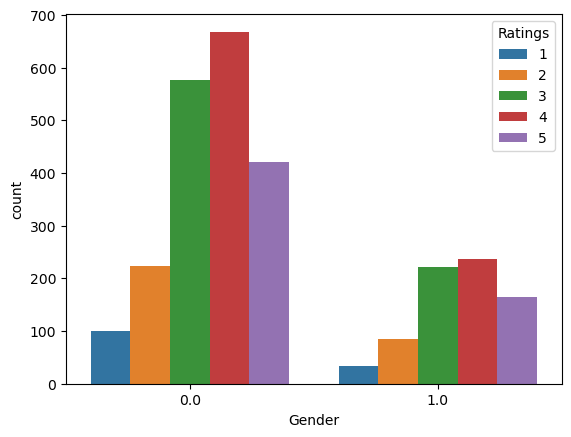

In [297]:
sns.countplot(x=data['Gender'],hue=data['Ratings'])

Plotting a Histogram between Age and Ratings

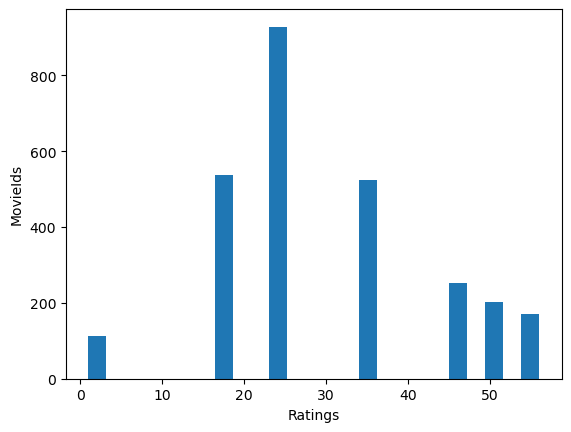

In [298]:
data.Age.plot.hist(bins=25)
plt.ylabel('MovieIds')
plt.xlabel('Ratings')
plt.show()

Seeing the rating value count of Ratings

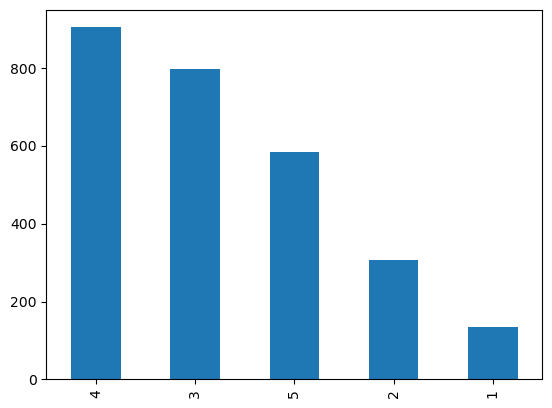

In [299]:
data['Ratings'].value_counts().plot(kind='bar')
plt.show()

Plotting a histogram between MovieID and Ratings

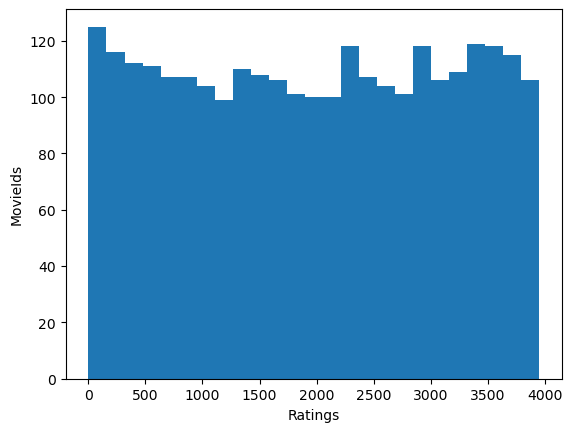

In [300]:
data.MovieIDs.plot.hist(bins=25)
plt.ylabel('MovieIds')
plt.xlabel('Ratings')

plt.show()

<AxesSubplot:ylabel='Frequency'>

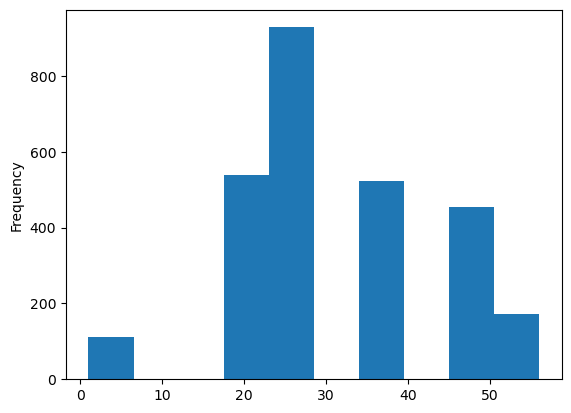

In [301]:
data['Age'].plot.hist(bins=10)

<AxesSubplot:xlabel='Age', ylabel='count'>

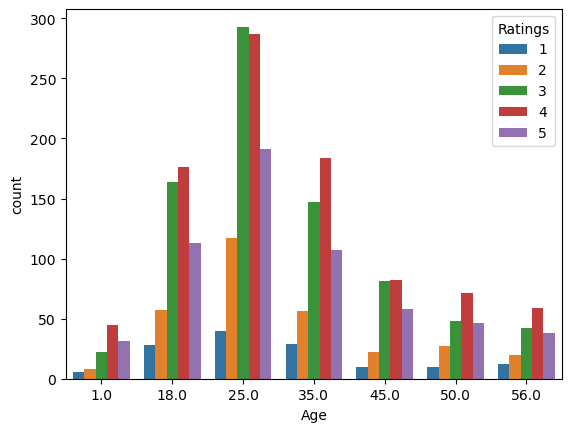

In [302]:
sns.countplot(x=data["Age"],hue=data['Ratings'])

This Concludes that age plays as booming column responsible for Ratings

In [303]:
data.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,UserID,Gender,Age
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,1.0,1.0,1.0
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,0.0,56.0
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,0.0,25.0
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,0.0,45.0
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,0.0,25.0


Dropping some coloumns based on visualisation

In [304]:
a = data.drop(['Ratings','MovieName','Category','MovieIDs'], axis =1)
b = data['Ratings'] 

In [305]:
b.head()

0    5
1    3
2    3
3    4
4    5
Name: Ratings, dtype: int64

In [306]:
a.head()

,ID,MovieID,UserID,Gender,Age
0,1,1193,1.0,1.0,1.0
1,1,661,2.0,0.0,56.0
2,1,914,3.0,0.0,25.0
3,1,3408,4.0,0.0,45.0
4,1,2355,5.0,0.0,25.0


Training the model using Logistic Regression

Ranging the data from 0 

In [307]:
sc = MinMaxScaler()
sdata=sc.fit_transform(a)
m= pd.DataFrame(sdata, 
                    columns = a.columns)
m.head()

,ID,MovieID,UserID,Gender,Age
0,0.0,0.302002,0.000000,1.0,0.000000
1,0.0,0.167216,0.000258,0.0,1.000000
2,0.0,0.231315,0.000515,0.0,0.436364
3,0.0,0.863187,0.000773,0.0,0.800000
4,0.0,0.596402,0.001031,0.0,0.436364


Dividing Data into Test and Training set

In [308]:
x_train , x_test , y_train , y_test = train_test_split(a,b,test_size =0.2 , random_state =10)

In [309]:
y_train

3759    5
3556    1
3734    3
13      4
2046    1
       ..
2871    2
1656    4
1875    3
707     4
1807    5
Name: Ratings, Length: 2181, dtype: int64

In [310]:
x_train

,ID,MovieID,UserID,Gender,Age
3759,26,207,3760.0,0.0,50.0
3556,26,429,3557.0,0.0,18.0
3734,26,3269,3735.0,0.0,25.0
13,1,2918,14.0,0.0,35.0
2046,18,839,2047.0,0.0,1.0
...,...,...,...,...,...
2871,23,2,2872.0,0.0,25.0
1656,15,1210,1657.0,1.0,45.0
1875,17,3744,1876.0,0.0,25.0
707,9,2278,708.0,0.0,25.0


Running the Model Prediction

In [311]:
model=LogisticRegression(max_iter=5000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [312]:
model.predict(x_test)

array([4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3,
       4, 4, 3, 3, 4, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 3, 4, 3,
       4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4,
       4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 4, 3, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4,
       3, 4, 3, 3, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 3,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3,
       4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4,
       3, 3, 4, 3, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3, 4, 4, 3, 4, 4, 3, 4, 4,
       4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4,
       4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 3, 4,
       4, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3,